In [1]:
import pandas as pd
import numpy as np

from numpy.random import seed

from keras.layers.experimental import preprocessing
from keras.models import Sequential
from keras.layers import Dense

from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import tensorflow as tf

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
OUTPUT_PATH = './Data/output/'

### Import dataset

In [39]:
dataset_raw = pd.read_csv(OUTPUT_PATH + 'CleanData_Population_Schools_SDGs.csv')
dataset = dataset_raw.dropna()
dataset.head()

,PSGC_BRGY,both_age_0_to_4,male_age_0_to_4,female_age_0_to_4,both_age_5_to_9,male_age_5_to_9,female_age_5_to_9,both_age_10_to_14,male_age_10_to_14,female_age_10_to_14,...,SDG_Type_Worker_Pro,SDG_Type_Worker_Tec,SDG_Type_Worker_Cle,SDG_Type_Worker_Ser,SDG_Type_Worker_Ski,SDG_Type_Worker_Cra,SDG_Type_Worker_Pla,SDG_Type_Worker_Ele,SDG_Type_Worker_Arm,SDG_less_than_54_sqft
0,PH150702001,88.0,54.0,34.0,79.0,35.0,44.0,73.0,42.0,31.0,...,0.042654,0.014218,0.085308,0.208531,0.507109,0.033175,0.014218,0.052133,0.023697,0.275449
1,PH150702002,210.0,100.0,110.0,161.0,77.0,84.0,133.0,69.0,64.0,...,0.047619,0.002976,0.011905,0.047619,0.529762,0.053571,0.119048,0.113095,0.000000,0.287554
3,PH150702005,277.0,152.0,125.0,305.0,159.0,146.0,269.0,155.0,114.0,...,0.051637,0.021411,0.040302,0.070529,0.488665,0.032746,0.059194,0.164987,0.011335,0.002092
4,PH150702006,352.0,146.0,206.0,354.0,201.0,153.0,398.0,217.0,181.0,...,0.016966,0.002994,0.023952,0.106786,0.525948,0.019960,0.048902,0.171657,0.004990,0.061657
5,PH150702007,270.0,140.0,130.0,236.0,114.0,122.0,220.0,121.0,99.0,...,0.026316,0.011696,0.023392,0.084795,0.494152,0.081871,0.125731,0.096491,0.010234,0.391509


### Preprocess data

In [40]:
SDG = dataset.iloc[:,84:]

#### 1. Elementary

In [41]:
data_elem = SDG.copy()
data_elem['NUM_SCHOOLS'] = dataset['SCH_CAT_CES'] + dataset['SCH_CAT_ES'] + dataset['SCH_CAT_PS'] + dataset['SCH_CAT_PES']
data_elem['ELEM_POPN'] = dataset['both_age_6_to_12']
len(data_elem)

1529

#### 2. High School

In [42]:
data_hs = SDG.copy()
data_hs['NUM_SCHOOLS'] = dataset['SCH_CAT_JHS'] + dataset['SCH_CAT_SHS'] + dataset['SCH_CAT_PJHS'] + dataset['SCH_CAT_PSHS']
data_hs['HS_POPN'] = dataset['both_age_13_to_16']
len(data_hs)

1529

In [43]:
training_data, testing_data = train_test_split(data_hs, test_size=0.2, random_state=42)

In [44]:
X_train = training_data.drop(['NUM_SCHOOLS'], axis=1)
y_train = training_data['NUM_SCHOOLS']

X_test = testing_data.drop(['NUM_SCHOOLS'], axis=1)
y_test = testing_data['NUM_SCHOOLS']

In [45]:
normalizer = preprocessing.Normalization()
normalizer.adapt(np.array(X_train))

In [46]:
def base_model():
    model = Sequential()
    model.add(normalizer)
    model.add(Dense(4, input_dim=2, activation='relu'))
    model.add(Dense(4, activation='relu'))
    model.add(Dense(1, activation='linear'))
    model.compile(loss='mse', optimizer='adam')
#     model.add(Dense(20, activation='tanh', input_dim=5, kernel_initializer='uniform'))
#     model.add(Dense(1, activation='linear', kernel_initializer='uniform'))
    
    model.compile(loss='mse', optimizer='adam')
    return model

In [47]:
model = base_model()
EPOCHS = 200
BATCH_SIZE = 10

seed(1)

callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

history = model.fit(X_train, 
                    y_train, 
                    epochs=EPOCHS, 
                    batch_size=BATCH_SIZE,
                    validation_split=0.2,
                    callbacks=callback)

Epoch 1/200
98/98 [==============================] - 1s 4ms/step - loss: 1.0796 - val_loss: 0.5578
Epoch 2/200
98/98 [==============================] - 0s 2ms/step - loss: 0.5568 - val_loss: 0.4787
Epoch 3/200
98/98 [==============================] - 0s 1ms/step - loss: 0.4274 - val_loss: 0.4347
Epoch 4/200
98/98 [==============================] - 0s 2ms/step - loss: 0.3839 - val_loss: 0.3918
Epoch 5/200
98/98 [==============================] - 0s 2ms/step - loss: 0.4666 - val_loss: 0.3689
Epoch 6/200
98/98 [==============================] - 0s 2ms/step - loss: 0.3479 - val_loss: 0.3533
Epoch 7/200
98/98 [==============================] - 0s 1ms/step - loss: 0.2752 - val_loss: 0.3398
Epoch 8/200
98/98 [==============================] - 0s 2ms/step - loss: 0.3430 - val_loss: 0.3308
Epoch 9/200
98/98 [==============================] - 0s 2ms/step - loss: 0.2866 - val_loss: 0.3237
Epoch 10/200
98/98 [==============================] - 0s 2ms/step - loss: 0.3007 - val_loss: 0.3175
Epoch 11/

In [48]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
61,0.190901,0.323071,61
62,0.189302,0.318054,62
63,0.189540,0.321348,63
64,0.189718,0.326094,64
65,0.190024,0.325610,65


In [49]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Error')
    plt.legend()
    plt.grid(True)

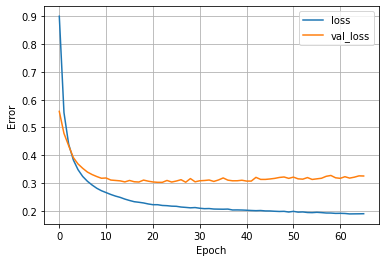

In [50]:
plot_loss(history)

In [51]:
y_pred = model.predict(X_test)

In [52]:
y_pred_round = np.round(y_pred)

In [53]:
accuracy_score(y_test, y_pred_round)

0.7679738562091504

In [54]:
model.save(OUTPUT_PATH + 'Model_NN_HS')

INFO:tensorflow:Assets written to: ./Data/output/Model_NN_HS\assets


### FEATURE IMPORTANCE

In [55]:
from sklearn.model_selection import cross_val_score, KFold
from keras.wrappers.scikit_learn import KerasRegressor

import eli5
from eli5.sklearn import PermutationImportance

In [56]:
estimator = KerasRegressor(build_fn=base_model, nb_epoch=EPOCHS, 
                    batch_size=BATCH_SIZE,
                    validation_split=0.2)
kfold = KFold(n_splits=10)

In [57]:
results = cross_val_score(estimator, X_train, y_train, cv=kfold)

13/13 [==============================] - 0s 1ms/step - loss: 0.3177


In [58]:
print("Results: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Results: -0.47 (0.21) MSE


In [59]:
estimator.fit(X_train, y_train)

98/98 [==============================] - 1s 4ms/step - loss: 0.4715 - val_loss: 0.4533


In [60]:
perm = PermutationImportance(estimator, random_state=1).fit(X_train, y_train)
eli5.show_weights(perm, feature_names = X_train.columns.tolist())

123/123 [==============================] - 0s 863us/step - loss: 0.3985


Weight,Feature
0.0139 ± 0.0142,SDG_Households_Construction_Material_Concrete_Pct
0.0113 ± 0.0013,HS_POPN
0.0069 ± 0.0139,SDG_Households_Drinking_Owned_Faucet_Pct
0.0037 ± 0.0068,SDG_Type_Worker_Pla
0.0026 ± 0.0052,SDG_Type_Building_Single_Pct
0.0021 ± 0.0095,SDG_Type_Worker_Ser
0.0015 ± 0.0016,SDG_less_than_54_sqft
0.0011 ± 0.0027,SDG_Type_Worker_Pro
0.0008 ± 0.0112,SDG_Households_Drinking_Shared_Faucet_Pct
-0.0005 ± 0.0018,SDG_Type_Worker_Ski


### PREDICT BRGY WITHOUT SCHOOL

In [61]:
dataset_null = dataset_raw[dataset_raw.isnull().any(axis=1)]
len(dataset_null)

953

In [62]:
dataset_null.head()

,PSGC_BRGY,both_age_0_to_4,male_age_0_to_4,female_age_0_to_4,both_age_5_to_9,male_age_5_to_9,female_age_5_to_9,both_age_10_to_14,male_age_10_to_14,female_age_10_to_14,...,SDG_Type_Worker_Pro,SDG_Type_Worker_Tec,SDG_Type_Worker_Cle,SDG_Type_Worker_Ser,SDG_Type_Worker_Ski,SDG_Type_Worker_Cra,SDG_Type_Worker_Pla,SDG_Type_Worker_Ele,SDG_Type_Worker_Arm,SDG_less_than_54_sqft
2,PH150702004,57.0,27.0,30.0,62.0,40.0,22.0,80.0,39.0,41.0,...,0.000000,0.000000,0.006711,0.000000,0.785235,0.026846,0.020134,0.067114,0.0,0.042553
28,PH150702054,69.0,40.0,29.0,65.0,28.0,37.0,60.0,32.0,28.0,...,0.024038,0.000000,0.000000,0.000000,0.740385,0.120192,0.028846,0.038462,0.0,0.000000
30,PH150702056,79.0,42.0,37.0,91.0,46.0,45.0,75.0,29.0,46.0,...,0.010256,0.000000,0.005128,0.071795,0.758974,0.056410,0.051282,0.005128,0.0,0.044444
31,PH150702057,95.0,39.0,56.0,90.0,46.0,44.0,90.0,47.0,43.0,...,0.000000,0.023669,0.011834,0.035503,0.479290,0.011834,0.071006,0.331361,0.0,0.570000
37,PH150702063,134.0,70.0,64.0,115.0,69.0,46.0,81.0,46.0,35.0,...,0.000000,0.006135,0.000000,0.092025,0.607362,0.012270,0.030675,0.202454,0.0,0.018692


In [63]:
X_predict = dataset_null.iloc[:,84:]
X_predict['ELEM_POPN'] = dataset_null['both_age_6_to_12']

In [64]:
y_pred_null = model.predict(X_predict)

In [65]:
predicted_df = X_predict.copy()
predicted_df['Pred_school_num'] = np.round(y_pred_null)
predicted_df['PSGC_BRGY'] = dataset_null['PSGC_BRGY']

In [66]:
predicted_df

,SDG_Households_Electricity_Light_Pct,SDG_Households_Kerosene_Gass_Light_Pct,SDG_Households_Drinking_Owned_Faucet_Pct,SDG_Households_Drinking_Shared_Faucet_Pct,SDG_Households_Construction_Material_Concrete_Pct,SDG_Building_Tenure_Type_Owned_Pct,SDG_Type_Building_Single_Pct,SDG_Type_Worker_Man,SDG_Type_Worker_Pro,SDG_Type_Worker_Tec,...,SDG_Type_Worker_Ser,SDG_Type_Worker_Ski,SDG_Type_Worker_Cra,SDG_Type_Worker_Pla,SDG_Type_Worker_Ele,SDG_Type_Worker_Arm,SDG_less_than_54_sqft,ELEM_POPN,Pred_school_num,PSGC_BRGY
2,0.396040,0.594059,0.019802,0.138614,0.090000,0.574257,1.000000,0.093960,0.000000,0.000000,...,0.000000,0.785235,0.026846,0.020134,0.067114,0.000000,0.042553,93.0,0.0,PH150702004
28,1.000000,0.000000,0.000000,0.000000,0.365854,0.970370,0.967480,0.033654,0.024038,0.000000,...,0.000000,0.740385,0.120192,0.028846,0.038462,0.000000,0.000000,86.0,0.0,PH150702054
30,0.442857,0.085714,0.007143,0.028571,0.057143,0.235714,1.000000,0.041026,0.010256,0.000000,...,0.071795,0.758974,0.056410,0.051282,0.005128,0.000000,0.044444,124.0,0.0,PH150702056
31,0.858407,0.141593,0.000000,0.000000,0.079646,0.610619,0.946903,0.035503,0.000000,0.023669,...,0.035503,0.479290,0.011834,0.071006,0.331361,0.000000,0.570000,128.0,0.0,PH150702057
37,0.601770,0.362832,0.000000,0.008850,0.035398,0.442478,0.982301,0.042945,0.000000,0.006135,...,0.092025,0.607362,0.012270,0.030675,0.202454,0.000000,0.018692,127.0,0.0,PH150702063
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2466,0.859425,0.031949,0.012780,0.006390,0.175926,1.000000,1.000000,0.061338,0.068773,0.014870,...,0.165428,0.520446,0.068773,0.016729,0.055762,0.009294,0.012048,258.0,0.0,PH157011001
2468,0.949074,0.050926,0.000000,0.000000,0.267045,0.995370,1.000000,0.025000,0.075000,0.022500,...,0.107500,0.630000,0.070000,0.007500,0.037500,0.002500,0.023188,180.0,0.0,PH157011003
2470,0.948598,0.000000,0.000000,0.000000,0.189542,0.985981,1.000000,0.032328,0.021552,0.000000,...,0.012931,0.797414,0.010776,0.000000,0.122845,0.002155,0.082192,294.0,0.0,PH157011005
2471,0.995595,0.000000,0.000000,0.000000,0.250000,0.977974,1.000000,0.028436,0.052133,0.002370,...,0.118483,0.722749,0.033175,0.004739,0.026066,0.007109,0.013699,302.0,0.0,PH157011006


In [67]:
predicted_df.to_csv(OUTPUT_PATH + 'Model_NN_Output_HS.csv', index=False)